## Aula 13: Regressão Linear e Polinomial


## Tópico 1: Aula regressão

In [1]:
#importando bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# from io import BytesIO
# file = BytesIO(var_com_bytes)
# pd.read_csv(file)
# download_file 
# get_object

# with file in BytesIO:
#     df.to_csv(file)
#     flask.send_email(file)

In [2]:
pd.read_csv('https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Pegando dados 

Como exemplo será usado os dados de [bike compartilhadas](https://www.kaggle.com/c/bike-sharing-demand), disponivel do Kaggle e adptada do site da [capital share bike](https://www.capitalbikeshare.com/system-data).


In [3]:
df_bike = pd.read_csv('../datasets/capital_share_bike_train.csv')
# 
# df_bike
df_bike.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df_bike.shape

(10886, 12)

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Convertendo para uma serie temporal

In [10]:
from datetime import datetime

hoje = datetime.today()

In [11]:
hoje

datetime.datetime(2021, 10, 25, 19, 26, 15, 555255)

In [18]:
datetime?

In [12]:
hoje.weekday()

0

In [13]:
dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
dias[hoje.weekday()]

'Segunda'

In [25]:
df_bike.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [26]:
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'], format='%Y-%m-%d %H:%M:%S')
# df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])
df_bike.set_index('datetime', inplace=True)
df_bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:xlabel='datetime'>

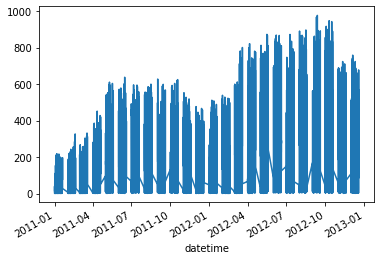

In [27]:
df_bike['count'].plot()

**Analisando apenas dados de 2012**

<AxesSubplot:xlabel='datetime'>

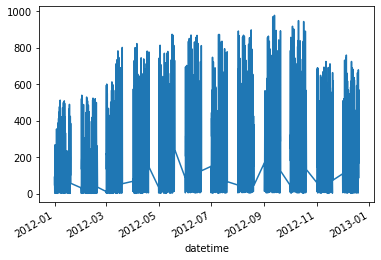

In [29]:
df_bike['2012']['count'].plot()

**Analisando apenas dados de junho de 2012**

<AxesSubplot:xlabel='datetime'>

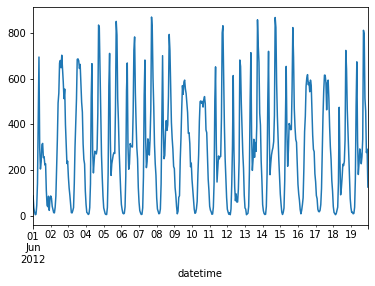

In [30]:
df_bike['2012-06']['count'].plot()

**Analisando apenas dados do dia 19 de Junho de 2012**

Teste com outros dias e perceba a sazionalidade dos dados

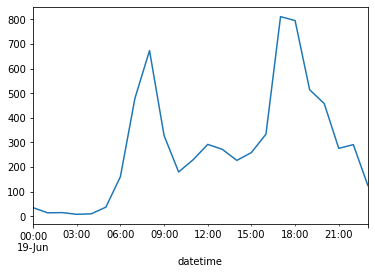

In [31]:
df_bike['2012/06/19']['count'].plot();

In [32]:
df_bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Análise com heatmap

In [33]:
df_bike.index.dayofweek

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='datetime', length=10886)

In [34]:
df_bike['day'] = df_bike.index.day

In [35]:
df_bike.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,19


In [36]:
df_bike['month'] = df_bike.index.month
df_bike['dayofweek'] = df_bike.index.dayofweek
df_bike['year'] = df_bike.index.year

In [37]:
df_bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,5,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,5,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2,2012
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2,2012
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2,2012


In [38]:
df_bike_md = df_bike.pivot_table(index='day', columns='month',
                                 values='count', aggfunc=np.mean)
df_bike_md

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,68.312500,126.361702,142.520833,172.250000,189.395833,168.770833,226.937500,246.791667,234.479167,191.812500,209.458333,185.791667
2,59.826087,110.145833,111.000000,174.212766,220.208333,272.666667,236.375000,252.208333,219.520833,157.437500,209.020833,178.937500
3,77.934783,121.297872,119.812500,208.770833,226.500000,269.854167,235.604167,223.937500,219.125000,232.125000,189.833333,205.166667
4,83.617021,96.595745,111.812500,198.979167,186.020833,257.083333,280.125000,237.500000,245.916667,245.500000,190.687500,210.229167
5,103.659574,82.333333,112.708333,171.916667,235.750000,248.062500,227.208333,215.208333,217.979167,270.458333,191.354167,198.750000
6,121.361702,115.042553,97.042553,193.083333,228.479167,241.729167,225.750000,235.562500,189.638298,265.208333,194.479167,166.020833
7,128.319149,126.812500,144.425532,208.291667,228.895833,256.812500,196.500000,230.375000,197.916667,176.979167,188.958333,119.020833
8,91.333333,90.250000,156.562500,138.333333,209.604167,252.854167,181.500000,247.083333,166.340426,226.812500,202.553191,185.500000
9,66.625000,115.638298,134.583333,167.500000,189.145833,237.770833,248.020833,247.666667,245.229167,247.979167,210.437500,142.666667


<AxesSubplot:xlabel='month', ylabel='day'>

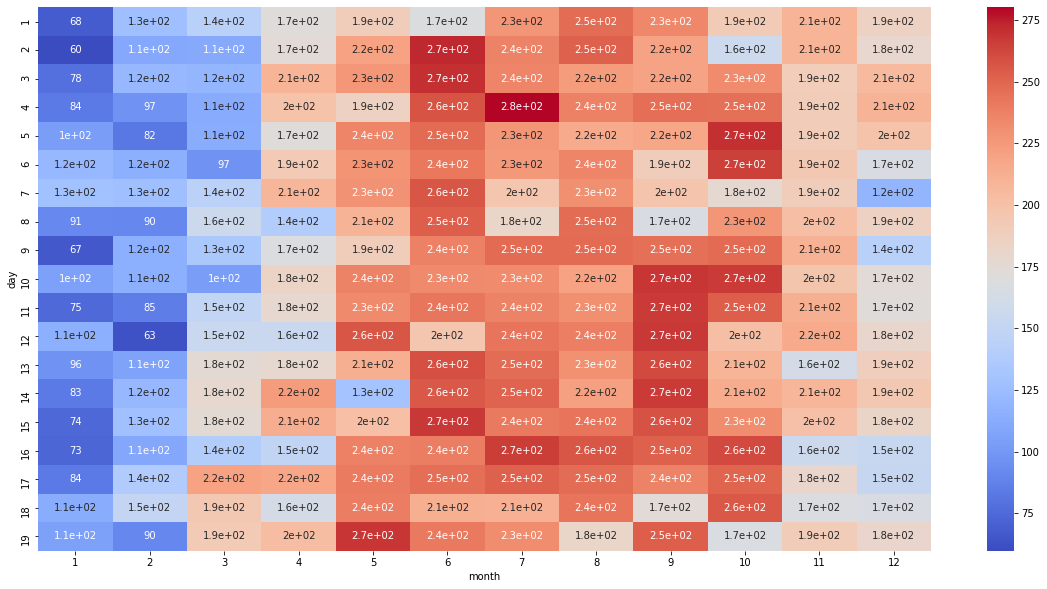

In [39]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_bike_md, cmap='coolwarm', annot=True)

<AxesSubplot:xlabel='month', ylabel='dayofweek'>

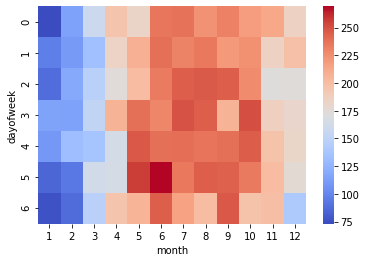

In [40]:
df_bike_mdow = df_bike.pivot_table(index='dayofweek', columns='month',
                                 values='count', aggfunc=np.mean)
sns.heatmap(df_bike_mdow, cmap='coolwarm')

<AxesSubplot:xlabel='year', ylabel='month'>

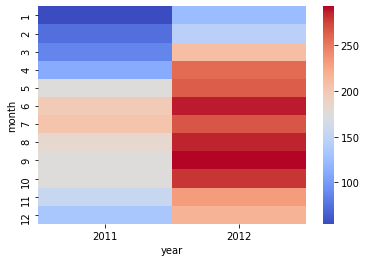

In [41]:
df_bike_my = df_bike.pivot_table(index='month', columns='year',
                                 values='count', aggfunc=np.mean)
sns.heatmap(df_bike_my, cmap='coolwarm')

### Agrupando dados

Fizemos análise descritiva, porém queremos apenas descobrir os dados de usuarios mensais então vamos agrupá-los

In [42]:
df_bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,5,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,5,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,5,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,5,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,12,2,2012
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,12,2,2012
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,12,2,2012


[Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html)

[Freq Alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [46]:
df_group = df_bike.groupby(pd.Grouper(freq='M')).mean()
df_group.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,year
datetime,,,,,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012,9.825986,1.0,3.025522,2011.0
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256,10.015695,2.0,3.000000,2011.0
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776,9.955157,3.0,3.002242,2011.0
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374,9.997802,4.0,3.059341,2011.0
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211,10.000000,5.0,2.842105,2011.0
2011-06-30,2.0,0.000000,0.684211,1.278509,28.191096,32.150910,58.291667,11.930099,42.982456,153.894737,196.877193,10.000000,6.0,3.263158,2011.0
2011-07-31,3.0,0.052632,0.631579,1.184211,29.967763,34.011656,60.403509,11.960793,57.335526,146.278509,203.614035,10.000000,7.0,3.052632,2011.0
2011-08-31,3.0,0.000000,0.789474,1.344298,29.667456,33.461711,62.166667,12.480543,38.552632,144.114035,182.666667,10.000000,8.0,2.736842,2011.0
2011-09-30,3.0,0.052980,0.629139,1.618102,25.141236,28.693256,74.830022,11.501445,40.421634,134.200883,174.622517,10.008830,9.0,3.169978,2011.0


In [47]:
df_group.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,year
season,1.000000e+00,0.159481,-0.081323,0.047970,0.300148,0.313430,0.541884,-0.678901,0.265723,0.466337,0.432483,0.272236,9.716254e-01,-0.137456,9.771254e-14
holiday,1.594807e-01,1.000000,-0.648203,-0.085000,-0.098198,-0.100926,-0.068973,0.124202,-0.001466,-0.049178,-0.038485,-0.140964,7.476073e-03,-0.318766,6.580665e-02
workingday,-8.132297e-02,-0.648203,1.000000,-0.000588,0.155296,0.161349,-0.056253,-0.011683,0.043088,0.102029,0.090586,0.267761,-3.161086e-02,-0.367399,-2.399085e-02
weather,4.797005e-02,-0.085000,-0.000588,1.000000,-0.307920,-0.297590,0.650784,-0.071920,-0.336978,-0.177004,-0.227481,-0.092798,6.581303e-02,0.006827,-6.983366e-02
temp,3.001484e-01,-0.098198,0.155296,-0.307920,1.000000,0.998894,0.211816,-0.511024,0.856069,0.581931,0.680349,0.343499,2.995484e-01,-0.086139,7.421911e-02
atemp,3.134297e-01,-0.100926,0.161349,-0.297590,0.998894,1.000000,0.225202,-0.518171,0.861554,0.591029,0.688867,0.357508,3.134354e-01,-0.100909,7.274776e-02
humidity,5.418838e-01,-0.068973,-0.056253,0.650784,0.211816,0.225202,1.000000,-0.596956,0.049122,0.134145,0.117081,0.118811,5.811329e-01,0.001601,-2.191318e-01
windspeed,-6.789011e-01,0.124202,-0.011683,-0.071920,-0.511024,-0.518171,-0.596956,1.000000,-0.332769,-0.504764,-0.480229,-0.132138,-6.924653e-01,-0.017365,-7.300515e-02
casual,2.657235e-01,-0.001466,0.043088,-0.336978,0.856069,0.861554,0.049122,-0.332769,1.000000,0.789671,0.879862,0.364216,2.555348e-01,-0.097352,3.922556e-01
registered,4.663374e-01,-0.049178,0.102029,-0.177004,0.581931,0.591029,0.134145,-0.504764,0.789671,1.000000,0.986369,0.457438,4.818202e-01,-0.109794,7.437231e-01


### Plotting

<AxesSubplot:>

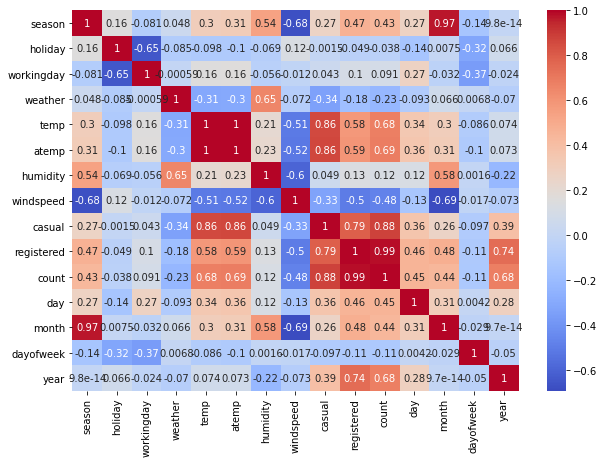

In [51]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_group.corr(), annot=True, cmap='coolwarm')

In [56]:
df_group['temp']

datetime
2011-01-31     8.633782
2011-02-28    11.331076
2011-03-31    14.063184
2011-04-30    17.776879
2011-05-31    21.528596
2011-06-30    28.191096
2011-07-31    29.967763
2011-08-31    29.667456
2011-09-30    25.141236
2011-10-31    20.903692
2011-11-30    16.036754
2011-12-31    12.897018
2012-01-31    10.987638
2012-02-29    12.256747
2012-03-31    17.704791
2012-04-30    19.661938
2012-05-31    23.819561
2012-06-30    25.937895
2012-07-31    31.715658
2012-08-31    29.805921
2012-09-30    26.412632
2012-10-31    20.963947
2012-11-30    14.332879
2012-12-31    14.765395
Freq: M, Name: temp, dtype: float64

In [57]:
df_group['count']

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: M, Name: count, dtype: float64

In [58]:
from scipy.stats import pearsonr

pearsonr(df_group['temp'], df_group['count'])

(0.6803485341277289, 0.00025400301517229743)

In [80]:
pearsonr(range(0, 3),  [1, 1, 2])

(0.8660254037844386, 0.3333333333333335)

In [82]:
aux = pd.DataFrame()

In [83]:
aux['a'] = range(0, 3)
aux['b'] = [1, 1, 2]

In [84]:
aux.corr()

,a,b
a,1.000000,0.866025
b,0.866025,1.000000


<AxesSubplot:>

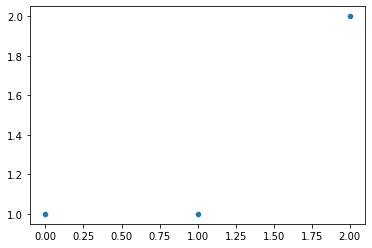

In [85]:
sns.scatterplot(x=range(0, 3), y= [1, 1, 2])

<AxesSubplot:xlabel='temp', ylabel='count'>

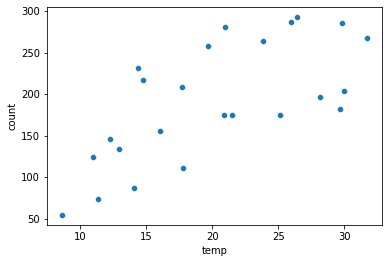

In [49]:
sns.scatterplot(data=df_group, x='temp', y='count')

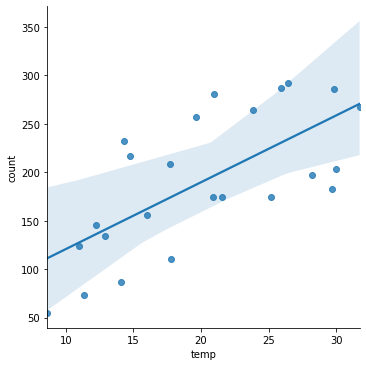

In [90]:
sns.lmplot(data=df_group, x='temp', y='count', ci=100)

### Regressão simples

Fundamentalmente, assume: (i) variáveis quantitativas numéricas para as variáveis preditora e resposta; (ii) uma relação linear entre as variáveis preditora e resposta. Sendo $y$ o valor observado, $\hat{y}$ o valor estimado e $x$ o valor observado para a variável preditora, o modelo dessa reta é:

$$y_{i} = \beta_{1} + \beta_{2} x_{i} + \epsilon_{i}$$

Onde: $\beta$ são parâmetros da equação e $\epsilon$ é o erro aleatório associado à variável. O objetivo da regressão é estimar valores para esses parâmetros que resultam na reta que melhor "se ajusta" aos dados. Ou seja:

$$Y = \beta_{1} + \beta_{2} X + \epsilon$$


$$\epsilon = Y - (\beta_{1} + \beta_{2} X)$$

$\epsilon$ pode ser entendido como os desvios dos valores preditos em relação aos valores observados. A regressão linear simples consiste em minimizar $\epsilon$ para obter os melhores valores para os parâmetros ($\hat{\beta_{1}}$ e $\hat{\beta_{2}}$). Esta abordagem é chamada *método dos quadrados mínimos ordinários* As equações exatas para o cálculo dos parâmetros podem ser encontradas [aqui](https://en.wikipedia.org/wiki/Simple_linear_regression). 

Para fazer a regressão vamos utilizar o [sklearn](https://scikit-learn.org). Esta biblioteca contêm vários métodos de apredizado de maquina, vamos utilizar ela em todas as aulas adiante. 

Para fazer uma regressão precisamos separa quais os dados serão os valores esperados (y) e quais serão as variaveis para chegarmos a este valor (x).

No exemplo passado queremos encontrar uma função que de o valor de numero de usuarios das bike, 
ou seja queremos encontrar o **count**, para isto podemos usar as demais variaveis. 
Porém é importante tiramos o  **casual** e o **registered**, pois eles também são valores do numero de usuarios das bicicletas, outro ponto importante é que a função de apredizado apenas funciona para dados numericos, assim devemos retirar a coluna datatime também.



In [91]:
df_group.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofweek,year
datetime,,,,,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012,9.825986,1.0,3.025522,2011.0
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256,10.015695,2.0,3.000000,2011.0
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776,9.955157,3.0,3.002242,2011.0
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374,9.997802,4.0,3.059341,2011.0
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211,10.000000,5.0,2.842105,2011.0


In [92]:
y = df_group['count']
x = df_group.drop(['count','casual','registered'],axis=1)

In [93]:
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,month,dayofweek,year
datetime,,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,9.825986,1.0,3.025522,2011.0
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,10.015695,2.0,3.000000,2011.0
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,9.955157,3.0,3.002242,2011.0
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,9.997802,4.0,3.059341,2011.0
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,10.000000,5.0,2.842105,2011.0
2011-06-30,2.0,0.000000,0.684211,1.278509,28.191096,32.150910,58.291667,11.930099,10.000000,6.0,3.263158,2011.0
2011-07-31,3.0,0.052632,0.631579,1.184211,29.967763,34.011656,60.403509,11.960793,10.000000,7.0,3.052632,2011.0
2011-08-31,3.0,0.000000,0.789474,1.344298,29.667456,33.461711,62.166667,12.480543,10.000000,8.0,2.736842,2011.0
2011-09-30,3.0,0.052980,0.629139,1.618102,25.141236,28.693256,74.830022,11.501445,10.008830,9.0,3.169978,2011.0


In [94]:
y

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: M, Name: count, dtype: float64

Para utilizarmos a regressão vamos importar a classe [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

Nesta classe, assim como outros metodos de regressão e classifica, temos a função train, no qual e necessário passar os dados para encontrar (treinar) a função alvo. Apos treinada podemos predizer novos dados com predict.

In [95]:
from sklearn.linear_model import LinearRegression

#Criando objeto de regressão
lr = LinearRegression()

#Treinando regressão
lr.fit(x,y)

LinearRegression()

Agora temos a regressão treinada podemos predizer dados a partir desta regressão, desde que este dado tenha os mesmo valores

In [96]:
# valor original do count
value_orig = df_group.iloc[10].loc['count']

# retirando valor não utilizados na regressão
df_test = df_group.iloc[10].drop(['count','casual','registered'])

In [99]:
df_group.iloc[10]

season           4.000000
holiday          0.052632
workingday       0.684211
weather          1.333333
temp            16.036754
atemp           19.417303
humidity        64.127193
windspeed       12.112219
casual          22.269737
registered     133.188596
count          155.458333
day             10.000000
month           11.000000
dayofweek        3.000000
year          2011.000000
Name: 2011-11-30 00:00:00, dtype: float64

In [97]:
value_orig

155.45833333333334

In [98]:
df_test

season           4.000000
holiday          0.052632
workingday       0.684211
weather          1.333333
temp            16.036754
atemp           19.417303
humidity        64.127193
windspeed       12.112219
day             10.000000
month           11.000000
dayofweek        3.000000
year          2011.000000
Name: 2011-11-30 00:00:00, dtype: float64

In [100]:
# predizendo o valor
value_pred = lr.predict([df_test])

In [101]:
value_pred

array([160.67353438])

In [102]:
#Comparando valores
print(f"Original:{round(value_orig, 2)}\
    \nPredito: {round(value_pred[0], 2)}")

Original:155.46    
Predito: 160.67


Vamos fazer a predição de todos os dados que temos, para assim verificar qual o error medio de nosso modelo de regressão

In [103]:
x.shape

(24, 12)

In [107]:
lr.coef_

array([  17.73737033,   82.18235942,  224.22244959, -104.65668469,
        -43.27797051,   46.27511994,    1.8567769 ,    7.53186236,
       -299.64626849,    0.32384521,   72.27595272,  102.89493638])

In [104]:
y_pred = lr.predict(x)
y_pred

array([ 49.09181384,  60.69415908,  94.73024536, 127.07328852,
       155.99345847, 195.03890827, 213.64538008, 200.2055199 ,
       160.30026091, 171.48849793, 160.67353438, 134.22217701,
       130.58218898, 153.27722897, 224.93994352, 234.39106541,
       267.01895973, 274.29521558, 283.21090139, 273.35871669,
       290.98656468, 269.45072569, 231.62085809, 228.64586548])

In [105]:
y_pred

array([ 49.09181384,  60.69415908,  94.73024536, 127.07328852,
       155.99345847, 195.03890827, 213.64538008, 200.2055199 ,
       160.30026091, 171.48849793, 160.67353438, 134.22217701,
       130.58218898, 153.27722897, 224.93994352, 234.39106541,
       267.01895973, 274.29521558, 283.21090139, 273.35871669,
       290.98656468, 269.45072569, 231.62085809, 228.64586548])

In [106]:
y.to_list()

[54.64501160092807,
 73.64125560538116,
 86.84977578475336,
 111.02637362637363,
 174.80921052631578,
 196.87719298245614,
 203.6140350877193,
 182.66666666666666,
 174.6225165562914,
 174.77362637362637,
 155.45833333333334,
 134.1732456140351,
 124.3532008830022,
 145.64615384615385,
 208.27692307692308,
 257.45594713656385,
 264.109649122807,
 287.18640350877195,
 267.0372807017544,
 285.5701754385965,
 292.5986842105263,
 280.50877192982455,
 231.98021978021978,
 217.0548245614035]

In [109]:
from sklearn.metrics import mean_absolute_error, r2_score

#### Mean Absolute Error (MAE)

$MAE=\frac{\sum_{i=1}^{n} |y_{i} - x_{i} |}{n}$

In [110]:
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MAE: {mae}')
print(f'R2: {r2}')

MAE: 9.829897585787947
R2: 0.9718331075905329


Porém esse valor sozinho não e muito representativo, afinal ele é muito o pouco?

Para termos um valor mais representativo vamos compará-lo com a média de usuários mensais

In [111]:
y_mean = y.mean()
print(mae / y_mean)

0.05145493174184549


Erro próximo a 5%

Um detalhe importante do modelo de regressão é o fato que conseguimos ver o peso de cada variável, isto pode ser interessante para saber qual variável e mais importante chegarmos ao valor alvo. para encontrar este valor comando abaixo.

In [112]:
lr.coef_

array([  17.73737033,   82.18235942,  224.22244959, -104.65668469,
        -43.27797051,   46.27511994,    1.8567769 ,    7.53186236,
       -299.64626849,    0.32384521,   72.27595272,  102.89493638])

In [113]:
x.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'day', 'month', 'dayofweek', 'year'],
      dtype='object')

In [114]:
df_coef = pd.DataFrame(lr.coef_, index=x.columns, columns=['coef'])
df_coef

,coef
season,17.737370
holiday,82.182359
workingday,224.222450
weather,-104.656685
temp,-43.277971
atemp,46.275120
humidity,1.856777
windspeed,7.531862
day,-299.646268
month,0.323845


In [115]:
lr.intercept_

-204488.9162639858

## Tópico 2: Overfitting

Overfit é um dos conceitos mais importantes em apredizado de maquina. Muitas vezes os modelos de aprendizado criado pelas pessoas têm 100% de acerto, porém  durante sua utilização eles tem um acerto menor que 50%.

Isto pode ocorrer caso os teste tenham sido feito no mesmo conjunto usado para treinar os dados (como no exemplo acima), assim o modelo fica fica especialista apenas neste conjunto, não reconhecendo os demais. Nos slides existem exemplos de overfit, porém o codigo abaixo apresenta outro.

Para demonstrar overfit ser usado o conjuto de teste [anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [116]:
df_anscombe = sns.load_dataset('anscombe')
df_anscombe.head(20)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [117]:
df_anscombe.query('dataset == "III"')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [119]:
df_anscombe[df_anscombe.x > df_anscombe.y]

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
8,I,12.0,10.84
9,I,7.0,4.82
11,II,10.0,9.14
13,II,13.0,8.74


In [122]:
# df_anscombe.where(df_anscombe.x > df_anscombe.y, )

In [123]:
df_anscombe.query('x > y')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
8,I,12.0,10.84
9,I,7.0,4.82
11,II,10.0,9.14
13,II,13.0,8.74


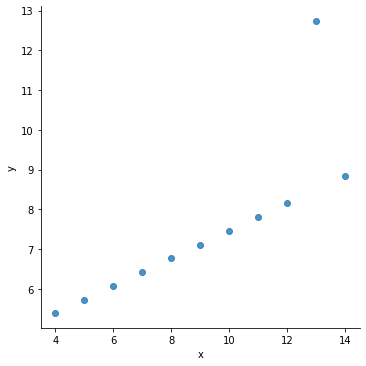

In [124]:
sns.lmplot(data=df_anscombe.query('dataset == "III"'),
           x='x',y='y',ci=False,fit_reg=False);

In [125]:
pearsonr(df_anscombe.query('dataset == "III"').x, df_anscombe.query('dataset == "III"').y)

(0.8162867394895982, 0.002176305279228025)

df_anscombe.query('dataset == "III"')

Vamos supor que este dado represente valores de medições de um sensor, porém o sensor teve um pequeno problema durante a medição nos dando dado invalido. Podemos perceber facilmente qual é este error, e qual seria a função de regreesão para este sensor com os dados validos. Então vamos aplicar um modelo de regressão linear.

f(x) = x^3

df/dx = 3*x^2 

d2f/dx = 6*x

d3f/dx = 6

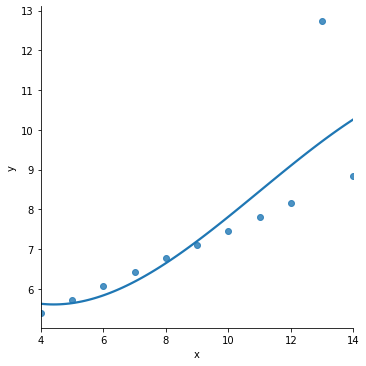

In [128]:
sns.lmplot(data=df_anscombe.query('dataset == "III"'),
           x='x',y='y',ci=False, order=3);

Perceba que a função linear encontrar já aprensenta um padrão muito similiar aos dados, porém um ponto error faz com que ela não tenha um resultado otimo.

Podemos utilizar regressões polinomiais, que possuem ordem maiores que 1, para tentar diminuir o erro da regressão, obtendo uma equação do formato.

$$\hat{y}_{i} = \beta_{1} + \beta_{2} x_{i} + \beta_{3} {x_{i}}^{2} + \epsilon_{i}$$

(2.0, 16.0)

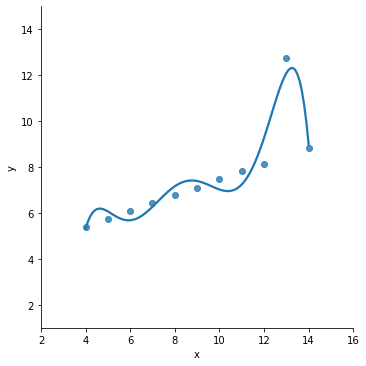

In [132]:
sns.lmplot(data=df_anscombe.query('dataset == "III"'),
           x='x',y='y',ci=False,order=6)
plt.ylim(1,15)
plt.xlim(2,16)

Ao utilizarmos uma regressão de ordem 6 percebemos que ela se ajusta ao valor com error, porém ela se distancia da regressão que realmente representa os dados. Tentar aprender o error faz com ela com ela não aprenda a função real. Isto acontece pois ela se super ajustou  aos dados passados, se distanciando dos dados reais. 

### Treino e teste

Uma tecninca para impedir o overfit é separar o conjunto em dois grupos um para treino e outro para teste, assim o algoritmo aprende apenas olhando um conjuto e testa sua equação em outros. Testando em dados que o algoritmo nunca conheceu permite uma verificação mais precisa de sua equação.

Para isto vamos utilizar a função train_test_split do sklearn, que, dado um conjunto x e y, ela retorna quarto grupos de valores. Por padrão ela separa 75% dos dados para treino e 25% para teste.

Com isto conseguimos calcular um valor de erro mais correto.

In [133]:
x = df_anscombe.query('dataset == "III"')['x']
y = df_anscombe.query('dataset == "III"')['y']


In [134]:
from sklearn.model_selection import train_test_split


In [135]:
x

22    10.0
23     8.0
24    13.0
25     9.0
26    11.0
27    14.0
28     6.0
29     4.0
30    12.0
31     7.0
32     5.0
Name: x, dtype: float64

In [136]:
y

22     7.46
23     6.77
24    12.74
25     7.11
26     7.81
27     8.84
28     6.08
29     5.39
30     8.15
31     6.42
32     5.73
Name: y, dtype: float64

In [142]:
x.values.reshape(-1,1)

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [143]:
y

22     7.46
23     6.77
24    12.74
25     7.11
26     7.81
27     8.84
28     6.08
29     5.39
30     8.15
31     6.42
32     5.73
Name: y, dtype: float64

In [146]:
x.values.reshape(-1,1).shape

(11, 1)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1,1), y, random_state=42)
X_train

array([[ 5.],
       [13.],
       [ 8.],
       [12.],
       [11.],
       [ 4.],
       [ 9.],
       [ 6.]])

In [179]:
X_test

array([[14.],
       [10.],
       [ 7.]])

In [180]:
print(X_train.shape)
print(X_test.shape)

(8, 1)
(3, 1)


In [181]:
lr = LinearRegression()
#Treinando regressão
lr.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred = lr.predict(X_test)

In [183]:
preditos_or = lr.predict(X_train)

In [185]:
preditos = lr.predict(X_test)

mae = mean_absolute_error(y_test, preditos)
print(mae/y_test.mean())

0.1295735148067895


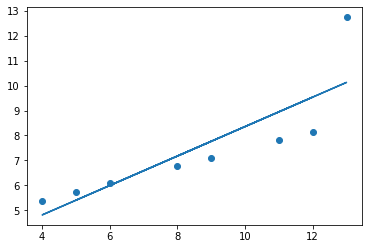

In [186]:
plt.scatter(X_train, y_train)
plt.plot(X_train, preditos_or)

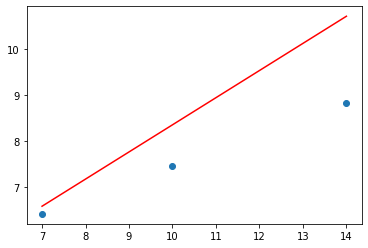

In [187]:
plt.scatter(X_test, y_test)
plt.plot(X_test, preditos, color='red')

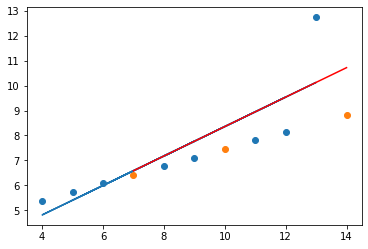

In [188]:
plt.scatter(X_train, y_train)
plt.plot(X_train, preditos_or)
plt.scatter(X_test, y_test)
plt.plot(X_test, preditos, color='red')

In [191]:
df_anscombe.query('dataset == "III"')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [193]:
df_anscombe.query('dataset == "III"').sort_values(by='y', ascending=False)[1:]

,dataset,x,y
27,III,14.0,8.84
30,III,12.0,8.15
26,III,11.0,7.81
22,III,10.0,7.46
25,III,9.0,7.11
23,III,8.0,6.77
31,III,7.0,6.42
28,III,6.0,6.08
32,III,5.0,5.73
29,III,4.0,5.39


In [194]:
df_anscombe.query('dataset == "III"')['y'].idxmax()

24

In [195]:
df_anscombe.query('dataset == "III"')[df_anscombe.query('dataset == "III"')['y'] < df_anscombe.query('dataset == "III"')['y'].max()]

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42
32,III,5.0,5.73


<AxesSubplot:>

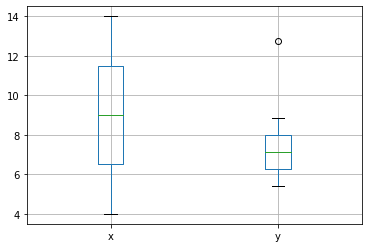

In [196]:
df_anscombe.query('dataset == "III"').boxplot()

In [197]:
idx = df_anscombe.query('dataset == "III"')['y'].idxmax()

In [198]:
df_anscombe.query('dataset == "III"')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [199]:
df = df_anscombe.query('dataset == "III"').drop(idx)

<AxesSubplot:>

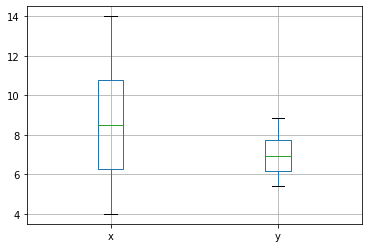

In [200]:
df.boxplot()

<AxesSubplot:>

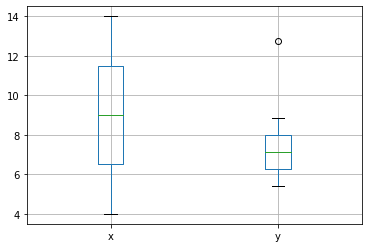

In [205]:
 df_anscombe.query('dataset == "III"').boxplot()

In [209]:
q1 = df_anscombe.y.quantile(.25)
q3 = df_anscombe.y.quantile(.75)
iqr = q3-q1
print(iqr)


2.630000000000001


In [213]:
df_anscombe.query('dataset == "III"').shape

(11, 3)

In [212]:
df_anscombe.query('dataset == "III"')[(df_anscombe.query('dataset == "III"').y > (q1 - 1.5*iqr)) & (df_anscombe.query('dataset == "III"').y < (q3 + 1.5*iqr))].shape

(10, 3)

In [201]:
x = df['x']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(x.values.reshape(-1,1), y)
lr = LinearRegression()
#Treinando regressão
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
preditos_or = lr.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
print(mae/y_test.mean())

0.00043069839973268193


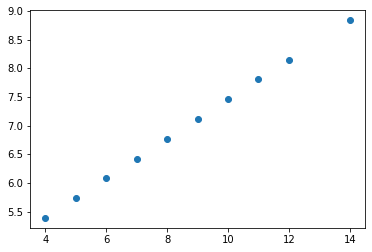

In [202]:
plt.scatter(x, y)


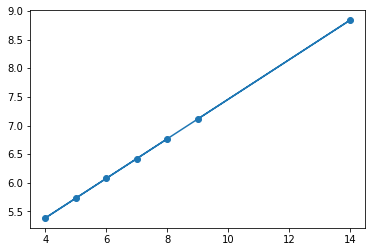

In [203]:
plt.scatter(X_train, y_train)
plt.plot(X_train, preditos_or)

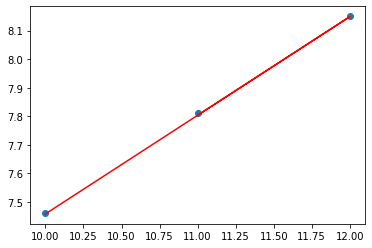

In [204]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')

### Validação cruzada

Porém a separação dos dados de treino e teste acontece de maneira aleatoria, assim podemos dar a sorte de selecionar os melhores dados para treino, ou o azar de selecionar os piores. Para que não tenhamos nossos testes em função da sorte, existe uma outra tecnica chamada de validação cruzada, na qual separamos os dados em conjuntos de igual tamanho e usamos todos para treino, e teste, cada durante o um ciclo, ao final comparamos o error medio.

In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
y = df_group['count']
x = df_group.drop(['count','casual','registered'],axis=1)

In [216]:
#Neste exemplo vamos separa os dados em 5 grupos 
lr = LinearRegression()
cv = cross_val_score(lr, x, y, cv=5, 
                     scoring='neg_mean_absolute_error')

In [217]:
# Aqui temos os valores de erro dos 5 teste 
cv

array([-43.29581861, -32.33774455, -32.82253067, -22.73310919,
       -15.19264846])

In [220]:
#Agora a media de error 
cv.mean()

-29.276370296647855

### EXERCICIO

In [221]:
pd.read_csv('../datasets/imoveis_Rio_de_Janeiro.csv', sep=';')

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
0,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
1,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
2,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
3,700,1,1.0,1.0,70,1,0,700000,99.0,10000.00
4,440,1,0.0,1.0,44,1,2,515000,99.0,11704.55
...,...,...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,7,270,680000,99.0,8500.00
1993,750,3,0.0,1.0,82,7,0,650000,99.0,7926.83
1994,700,3,1.0,1.0,100,7,0,629900,99.0,6299.00
1995,1850,3,1.0,2.0,166,7,330,1600000,99.0,9638.55


## Tópico 3: StatsModel

In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
ols = OLS(y, x).fit()

In [ ]:
ols.summary()

## Tópico 4: Análise

In [222]:
df_hw = pd.read_csv('../datasets/weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## *Feature selection*

Para saber quais colunas usar, vamos testar a influência de cada uma na variável dependente.

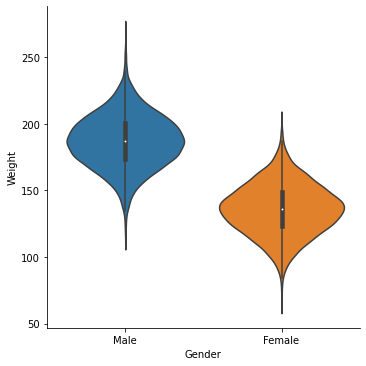

In [223]:
sns.catplot(data=df_hw, x='Gender', y='Weight', kind='violin')

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

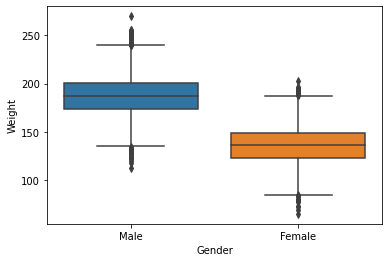

In [224]:
sns.boxplot(data=df_hw, x='Gender', y='Weight')

Vejam que existe uma diferença observável entre cada um dos gêneros. Isso é um indicativo de que essa coluna tem uma influência no peso; porém, essa influência pode ser fruto do acaso. Dessa forma devemos testar.

In [225]:
# Separando os dados
wmale = df_hw.loc[df_hw['Gender']=='Male','Weight']
wfemale = df_hw.loc[df_hw['Gender']=='Female','Weight']

In [226]:
wfemale

5000    102.088326
5001    141.305823
5002    131.041403
5003    128.171511
5004    129.781407
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 5000, dtype: float64

Tendo os dados separados, precisamos saber que teste usar para a correlação: paramétrico (caso normal) ou não-paramétrico (não normal).

In [227]:
from scipy.stats import shapiro

Para o teste de Shapiro-Wilker, temos:
- $H_0$: a amostra possui distribuição gaussiana (ou normal);
- $H_1$: a amostra não possui distribuição gaussiana (ou normal).

In [228]:
shapiro(wmale)

ShapiroResult(statistic=0.9995883107185364, pvalue=0.3871139585971832)

In [229]:
shapiro(wfemale)

ShapiroResult(statistic=0.9997838735580444, pvalue=0.9198973178863525)

Ambos os p-valores foram maiores que 0.05. Assim, num nível de 5%, aceitamos $H_0$, isso é, ambas amostras são normais.

Agora testaremos a correlação: será que as amostras `wmale` e `wfemale` vieram têm distribuições distintas, ou será que as diferenças observadas no gráfico são puro fruto do acaso? Uma vez que as distribuições são normais, poderemos aplicar o teste t:

In [230]:
wmale.std()

19.7811545167638

In [231]:
wfemale.std()

19.022467805319028

In [232]:
wmale.mean()

187.0206206581932

In [233]:
wfemale.mean()

135.86009300746835

Sendo os desvios-padrão diferentes, aplicaremos o teste t-Welch:

- $H_0$: não existe diferença média significante entre as amostras; ou
- $H_1$: existe diferenças médias siginificantes entre as amostras.

In [234]:
from scipy.stats import ttest_ind

In [235]:
ttest_ind(wmale, wfemale, equal_var=False)

Ttest_indResult(statistic=131.8195276508186, pvalue=0.0)

Sendo o p-valor igual a 0, a um nível de significância de 5% (ou, nesse caso, até menor), rejeitamos a hipótese nula, isso é, as amostras vêm de populações distintas. Sendo assim, concluímos que a coluna `Weight` é dependente da coluna `Gender`.

A segunda coluna a ser analisada, é a `Height`. Será que `Weight` e `Height` estão correlacionados? 

In [236]:
amostra = df_hw.sample(500)
height = amostra['Height']
weight = amostra['Weight']

Para saber qual teste usar, devemos antes testar a normalidade de ambas com o teste de Shapiro-Wilk:

 - $H_0$: a amostra possui distribuição gaussiana;
 - $H_1$: a amostra não possui distribuição gaussiana.

In [237]:
shapiro(height)

ShapiroResult(statistic=0.9954795241355896, pvalue=0.1568400263786316)

In [238]:
shapiro(weight)

ShapiroResult(statistic=0.988542377948761, pvalue=0.000590960611589253)

Assim, a um nível de significância de 5%, rejeitamos $H_0$, isso é, uma das amostras são **não normais**. Sendo assim, devemos usar um teste de correlação **não-paramétrico**. Testaremos com o Spearman:
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

In [239]:
from scipy.stats import spearmanr

In [240]:
spearmanr(height, weight)

SpearmanrResult(correlation=0.9297304069216276, pvalue=3.2989048129280467e-218)

Assim, a um nível de significância de 5%, rejeitamos a $H_0$, isso é, as amostras são monotonicamente dependentes, com um coeficiente de correlação de 0.919.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

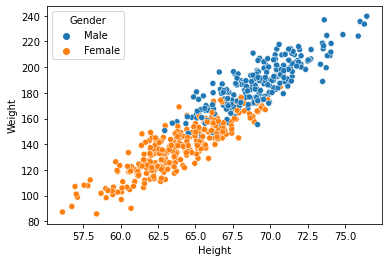

In [241]:
sns.scatterplot(data=amostra, x='Height', y='Weight', hue='Gender')

Dessa forma, num modelo de regressão linear com a variável dependente `Weight`, colocaremos as variáveis `Gender` e `Height`.

## Separação entre treino e teste

In [242]:
X = df_hw.drop('Weight', axis = 1)
X

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [243]:
X['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [266]:
titanic = pd.read_csv('../datasets/titanic.csv')
titanic['Pclass'] = titanic.Pclass.astype('str')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [267]:
pd.get_dummies(titanic[['Pclass', 'Sex', 'Age'] ])

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,0,0,1,0,1
1,38.0,1,0,0,1,0
2,26.0,0,0,1,1,0
3,35.0,1,0,0,1,0
4,35.0,0,0,1,0,1
...,...,...,...,...,...,...
886,27.0,0,1,0,0,1
887,19.0,1,0,0,1,0
888,NaN,0,0,1,1,0
889,26.0,1,0,0,0,1


In [244]:
X = pd.get_dummies(X)
y = df_hw['Weight']

In [247]:
X

,Height,Gender_Female,Gender_Male
0,73.847017,0,1
1,68.781904,0,1
2,74.110105,0,1
3,71.730978,0,1
4,69.881796,0,1
...,...,...,...
9995,66.172652,1,0
9996,67.067155,1,0
9997,63.867992,1,0
9998,69.034243,1,0


In [248]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.25, random_state=0)

## Construção do modelo

In [251]:
from sklearn.linear_model import LinearRegression

In [252]:
lr = LinearRegression()
lr.fit(X_treino, y_treino)

LinearRegression()

In [253]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [254]:
modelo.coef_

array([ 5.96794486, -9.70636386,  9.70636386])

In [255]:
X_treino.columns

Index(['Height', 'Gender_Female', 'Gender_Male'], dtype='object')

In [256]:
modelo.intercept_

-234.650374233288

In [257]:
X.head(1)

,Height,Gender_Female,Gender_Male
0,73.847017,0,1


Isso quer dizer que 

$$\text{Weight} = 5.97\cdot\text{Height}-9.71\cdot\text{Gender_Female} + 9.71\cdot\text{Gender_Male} - 234.65 + \text{erro}.$$

In [258]:
y_pred = modelo.predict(X_teste)
y_pred = pd.Series(y_pred, name='Predito', index=y_teste.index)
y_pred

9394    141.911789
898     176.532595
2398    219.793042
5906    148.811553
2343    162.055140
           ...    
8764    142.591020
4359    203.493438
2041    183.234557
1108    164.052225
3332    137.436045
Name: Predito, Length: 2500, dtype: float64

## Diagnose do modelo

### R2-score

In [268]:
from sklearn.metrics import r2_score

In [269]:
r2_score(y_teste, y_pred)

0.9017457495522369

Assim, nosso modelo possui 90% de eficiência.

### MAE e MSE

In [270]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [271]:
mae = mean_absolute_error(y_teste, y_pred)/y_teste.mean()
mse = np.sqrt(mean_squared_error(y_teste, y_pred)/y_teste.mean()**2)

In [272]:
(y_teste - y_pred).head(10)

9394    -3.825993
898     10.830771
2398    -3.259850
5906   -17.050110
2343    -4.336702
8225    -7.272195
5506     7.252656
6451    -0.796269
2670     4.060447
3497    14.150887
dtype: float64

In [273]:
mean_absolute_error(y_teste, y_pred)

8.092055004104235

In [274]:
mean_squared_error(y_teste, y_pred)

102.39646885019076

In [275]:
mae

0.05004360882850124

In [276]:
mse

0.06257952821550562

Assim, penalizando os casos mais errados, nossa predição se desviou apenas 6% da média.

### Resíduos

In [277]:
erro = y_pred - y_teste
erro.name = 'Residuals'
erro

9394     3.825993
898    -10.830771
2398     3.259850
5906    17.050110
2343     4.336702
          ...    
8764    21.496389
4359    -4.000253
2041    13.600158
1108    -5.407406
3332    13.807685
Name: Residuals, Length: 2500, dtype: float64

Os erros devem ter uma distribuição normal:

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

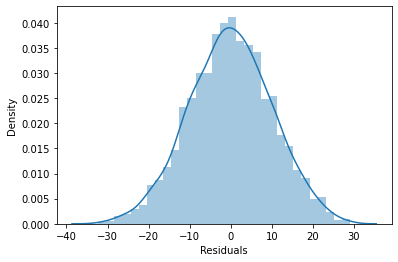

In [278]:
sns.distplot(erro)

In [279]:
shapiro(erro)

ShapiroResult(statistic=0.9991339445114136, pvalue=0.27817291021347046)

E a média deve ser próximo de 0:

In [280]:
erro.mean()

-0.05117664268223797

In [281]:
X_teste

,Height,Gender_Female,Gender_Male
9394,64.723877,1,0
898,67.272171,0,1
2398,74.520972,0,1
5906,65.880014,1,0
2343,64.846301,0,1
...,...,...,...
8764,64.837690,1,0
4359,71.789780,0,1
2041,68.395164,0,1
1108,65.180937,0,1


In [282]:
y_pred.shape

(2500,)

In [283]:
X_teste[X_teste['Gender_Male'] == 1].shape

(1263, 3)

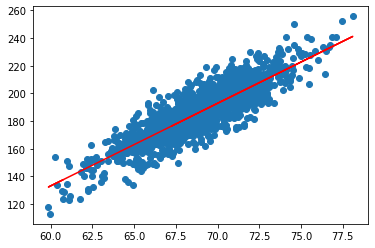

In [284]:
plt.scatter(X_teste[X_teste['Gender_Male'] == 1]['Height'], y_teste[X_teste['Gender_Male'] == 1])
plt.plot(X_teste[X_teste['Gender_Male'] == 1]['Height'], y_pred[X_teste['Gender_Male'] == 1], color='red')

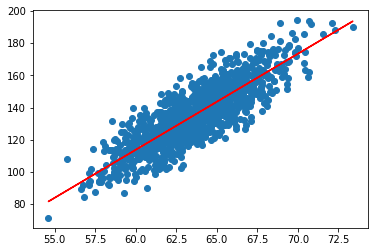

In [285]:
plt.scatter(X_teste[X_teste['Gender_Male'] == 0]['Height'], y_teste[X_teste['Gender_Male'] == 0])
plt.plot(X_teste[X_teste['Gender_Male'] == 0]['Height'], y_pred[X_teste['Gender_Male'] == 0], color='red')

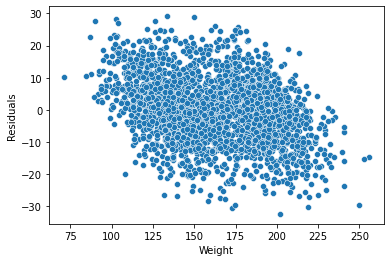

In [286]:
a = sns.scatterplot(y_teste, erro)

In [287]:
spearmanr(y_teste, erro)

SpearmanrResult(correlation=-0.3032614949218392, pvalue=2.444577401286717e-54)

<AxesSubplot:xlabel='Weight', ylabel='Predito'>

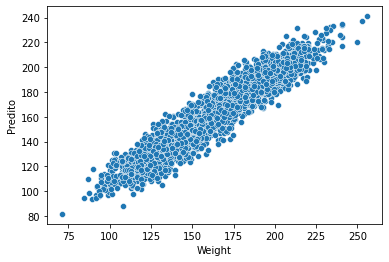

In [288]:
sns.scatterplot(y_teste, y_pred)

## Identificação dos outliers

In [289]:
y_ = modelo.predict(X)

In [290]:
erro = y_ - y

<AxesSubplot:xlabel='Weight', ylabel='Density'>

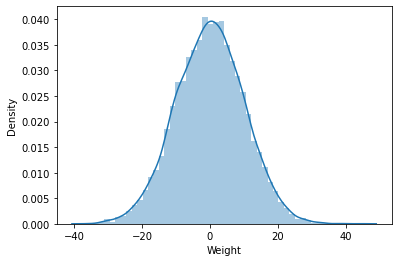

In [291]:
sns.distplot(erro)

In [292]:
erro.describe()

count    10000.000000
mean        -0.012794
std         10.013122
min        -35.847276
25%         -6.805756
50%          0.094203
75%          6.777525
max         44.146718
Name: Weight, dtype: float64

In [293]:
d = erro.describe()
Q1 = d["25%"]
Q3 = d['75%']
IQR = Q3 - Q1
LS = Q3 + 1.5*IQR
LI = Q1 - 1.5*IQR

In [294]:
normais = (erro > LI) & (erro < LS)
normais

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Weight, Length: 10000, dtype: bool

In [295]:
outliers = ~normais

In [296]:
dados_sem_out = df_hw[normais]
dados_sem_out

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [297]:
X = dados_sem_out.drop('Weight', axis=1)
X = pd.get_dummies(X)
y = dados_sem_out['Weight']

In [298]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.25, random_state=0)

In [299]:
modelo.fit(X_treino, y_treino)

LinearRegression()

In [300]:
y_pred = modelo.predict(X_teste)

In [301]:
r2_score(y_teste, y_pred)

0.9033415034951999

In [302]:
mae = mean_absolute_error(y_teste, y_pred)/y_teste.mean()
mse = np.sqrt(mean_squared_error(y_teste, y_pred)/y_teste.mean()**2)

In [303]:
mae

0.04823947285033721

In [304]:
mse

0.0601930038462571

In [305]:
res = y_teste-y_pred

<AxesSubplot:xlabel='Weight', ylabel='Weight'>

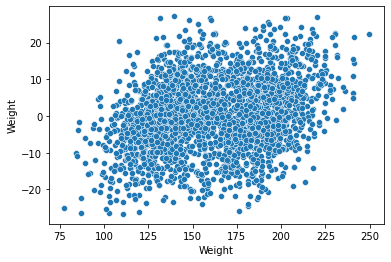

In [306]:
sns.scatterplot(y_teste, res)

In [307]:
from scipy.stats import probplot

<AxesSubplot:ylabel='Frequency'>

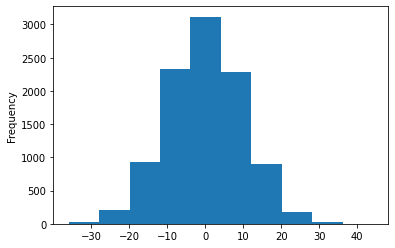

In [310]:
erro.plot.hist()

In [309]:
shapiro(erro)

ShapiroResult(statistic=0.9998077154159546, pvalue=0.5463154911994934)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-35.8472758 , -33.03080673, -32.31939249, ...,  37.94492861,
          38.60657987,  44.14671773])),
 (10.015234435176511, -0.01279416067057555, 0.9999031011344813))

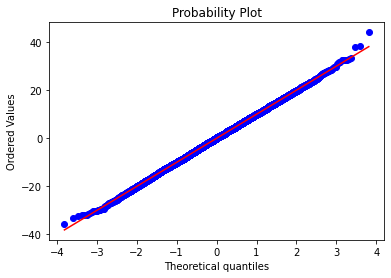

In [311]:
probplot(erro, plot=plt)

### Links / Referências (links para projetos sugeridos para aula ou links com informações importantes)
	* [Link 1](https://blog.ghost.org/markdown/)
	* [Link 2](https://guides.github.com/features/mastering-markdown/)
	* [Tutorial Markdown](http://cursos.leg.ufpr.br/prr/capMarkdown.html)
	* [Tutorial Markdown](https://www.markdowntutorial.com/)
	* [Editor Markdown](https://dillinger.io/)
	* [Editor Markdown 2](https://stackedit.io/)